In [38]:
%tensorflow_version 2.x
import tensorflow as tf
from keras import datasets, layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import shutil

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [9]:
from google.colab import files
uploaded = files.upload()


Saving CNNSnakes3.zip to CNNSnakes3.zip


In [10]:
import zipfile
import os

# Assuming the uploaded file is named 'cats_and_dogs.zip'
zip_file = 'CNNSnakes3.zip'
zip_ref = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [11]:
os.listdir("/content/CNNSnakes3/test/Russell_s viper")


['Russell_s viper.1132.jpg',
 'Russell_s viper.1125.jpg',
 'Russell_s viper.1130.jpg',
 'Russell_s viper.1133.jpg',
 'Russell_s viper.1135.jpg',
 'Russell_s viper.1120.jpg',
 'Russell_s viper.1134.jpg',
 'Russell_s viper.1124.jpg',
 'Russell_s viper.1131.jpg',
 'Russell_s viper.1123.jpg',
 'Russell_s viper.1129.jpg',
 'Russell_s viper.1128.jpg',
 'Russell_s viper.1121.jpg',
 'Russell_s viper.1122.jpg',
 'Russell_s viper.1127.jpg',
 'Russell_s viper.1126.jpg']

In [12]:
train_path = '/content/CNNSnakes3/train'
validation_path = '/content/CNNSnakes3/validation'
test_path = '/content/CNNSnakes3/test/'

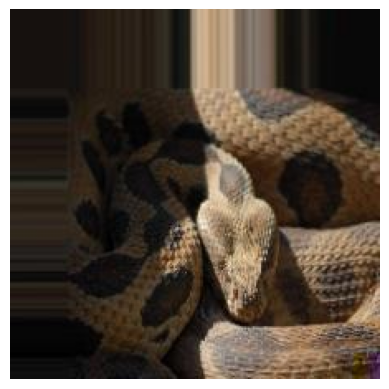

In [13]:
import matplotlib.pyplot as plt

image_path="/content/CNNSnakes3/train/Russell_s viper/Russell_s viper.221.jpg"
#image_path = os.path.join(train_path, "Russell's Viper/Russell's Viper.0.jpg")

# Read and display the image using matplotlib
image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

In [14]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

# Initialize ImageDataGenerator with preprocessing function
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True,
    # fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# Initialize ImageDataGenerator with preprocessing function for the test dataset
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)




In [15]:
# Load images using flow_from_directory
train_dataset = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

validation_dataset = validation_datagen.flow_from_directory(
    validation_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

# Load images using flow_from_directory
test_dataset = test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

print(train_dataset.class_indices)
print(validation_dataset.class_indices)

Found 5004 images belonging to 7 classes.
Found 830 images belonging to 7 classes.
Found 119 images belonging to 7 classes.
{'Boie_s Rough-Sided Snake': 0, 'Common Indian Krait': 1, 'Common Krait': 2, 'Common Kukri Snake': 3, 'Green Pit Viper': 4, 'Olive Keelback': 5, 'Russell_s viper': 6}
{'Boie_s Rough-Sided Snake': 0, 'Common Indian Krait': 1, 'Common Krait': 2, 'Common Kukri Snake': 3, 'Green Pit Viper': 4, 'Olive Keelback': 5, 'Russell_s viper': 6}


In [84]:
# Define the input shape
IMG_SHAPE = (224, 224, 3)

# Load the MobileNetV2 base model
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)

# Freeze all layers except the last 7
for layer in base_model.layers[:-7]:
    layer.trainable = False

# Define the input tensor
inputs = tf.keras.Input(shape=IMG_SHAPE)

# Pass inputs through the base model
x = base_model(inputs, training=False)

# Add global average pooling
x = layers.GlobalAveragePooling2D()(x)

# Add the final dense layer for classification
outputs = layers.Dense(7, activation='softmax')(x)

# Create the complete model
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_7           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │           8,967 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,266,951 (8.65 MB)

 Trainable params: 730,887 (2.79 MB)

 Non-trainable params: 1,536,064 (5.86 MB)

In [83]:
IMG_SHAPE = (224,224,3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [60]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [61]:
for layer in base_model.layers[:-7]:
    layer.trainable = False

In [85]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 721,920 (2.75 MB)

 Non-trainable params: 1,536,064 (5.86 MB)

In [67]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [86]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_7           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │           8,967 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,266,951 (8.65 MB)

 Trainable params: 730,887 (2.79 MB)

 Non-trainable params: 1,536,064 (5.86 MB)

In [71]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [87]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=4
)

Epoch 1/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.6016 - loss: 1.1322 - val_accuracy: 0.7892 - val_loss: 0.6076
Epoch 2/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.9098 - loss: 0.3119 - val_accuracy: 0.8518 - val_loss: 0.4163
Epoch 3/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.9595 - loss: 0.1776 - val_accuracy: 0.8976 - val_loss: 0.2922
Epoch 4/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.9838 - loss: 0.1071 - val_accuracy: 0.9205 - val_loss: 0.2067


In [73]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 7)                   │           8,967 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,728,727 (14.22 MB)

 Trainable params: 730,887 (2.79 MB)

 Non-trainable params: 1,536,064 (5.86 MB)

 Optimizer params: 1,461,776 (5.58 MB)

In [27]:
def prepare_img(file):
  img_path = test_path
  img = image.load_img(img_path + file, target_size=(224, 224))
  image_array = image.img_to_array(img)
  img_array_expanded = np.expand_dims(image_array, axis=0)
  return tf.keras.applications.mobilenet_v2.preprocess_input(img_array_expanded)

In [30]:

processed_img = prepare_img("Russell_s viper/Russell_s viper.1135.jpg")
predictions = model.predict(processed_img)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[3.6340127e-05 2.6672693e-05 1.3457818e-05 9.0898166e-04 1.0747204e-03
  9.1362293e-05 9.9784851e-01]]


In [88]:
# Save model to a temporary path
# Save the entire model as a `.keras` zip archive.
model.save('my_model3.keras')

In [89]:
new_model = tf.keras.models.load_model('my_model3.keras')

In [45]:
import tensorflow as tf

# Load the saved model
new_model = tf.keras.models.load_model('my_model3.keras')

# Print the model summary to inspect the architecture
new_model.summary()

ValueError: Layer "dense_1" expects 1 input(s), but it received 2 input tensors. Inputs received: [<KerasTensor shape=(None, 7, 7, 1280), dtype=float32, sparse=False, name=keras_tensor_802>, <KerasTensor shape=(None, 7, 7, 1280), dtype=float32, sparse=False, name=keras_tensor_803>]

In [90]:
# Download the model file
files.download('my_model3.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving snake.zip to snake (2).zip


In [ ]:
import zipfile
import os

# Assuming the uploaded file is named 'cats_and_dogs.zip'
zip_file = 'snake (2).zip'
zip_ref = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
os.listdir("/content/snake")

['rusta.jpeg', 'rusta2.jpeg', '.DS_Store']

In [81]:
import matplotlib.pyplot as plt

image_path="/content/snake/rusta2.jpeg"
#image_path = os.path.join(train_path, "Russell's Viper/Russell's Viper.0.jpg")

# Read and display the image using matplotlib
image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/snake/rusta2.jpeg'

In [79]:
import numpy as np

def prepare_img(file):
  img_path = test_path
  img = image.load_img(file, target_size=(224, 224))
  image_array = image.img_to_array(img)
  img_array_expanded = np.expand_dims(image_array, axis=0)
  return tf.keras.applications.mobilenet_v2.preprocess_input(img_array_expanded)

In [80]:
processed_img = prepare_img("/content/snake/rusta2.jpeg")
predictions = model.predict(processed_img)
print(predictions)

FileNotFoundError: [Errno 2] No such file or directory: '/content/snake/rusta2.jpeg'

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

4/4 [==============================] - 5s 980ms/step - loss: 0.4866 - accuracy: 0.7983
Test loss: 0.48663729429244995
Test accuracy: 0.7983193397521973


In [ ]:
model.save('mobilenet_saved_model', save_format='tf')

# Convert the SavedModel to TensorFlow.js format
!pip install tensorflowjs
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model mobilenet_saved_model mobilenet_tfjs_model

# Zip the converted model
shutil.make_archive('mobilenet_tfjs_model', 'zip', 'mobilenet_tfjs_model')

# Download the zipped model
files.download('mobilenet_tfjs_model.zip')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 24.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
     

2024-07-10 23:14:17.575590: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-10 23:14:17.608080: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-10 23:14:17.608157: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-10 23:14:19.415590: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>